# INM_Eventos

La fia

In [1]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

## Procesamiento 






#### Eventos de extranjeros presentados ante la autoridad migratoria, según entidad federativa
Procesamos las tablas estadisticas con datos sobre eventos de migrantes irregulares registrados por el INM por entidad federativa.

Los datos seleccionados se refieren unicamente a los eventos en los que migrantes fueron  ...

    2001 - 2012 la información incluye eventos de extranjeros en situación migratoria irregular a los que el Instituto Nacional de Migración (INM) les inició un procedimiento administrativo de aseguramiento y a los centroamericanos acogidos al “Memorándum de entendimiento entre los gobiernos de los Estados Unidos Mexicanos, de la República de El Salvador, de la República de Guatemala, de la República de Honduras y de la República de Nicaragua, para la repatriación digna, ordenada, ágil y segura de nacionales centroamericanos migrantes vía terrestre” suscrito el 5 de mayo de 2006 y su anexo del 26 de abril de 2007.

    2013 - 2020 la información incluye los eventos de migrantes en situación migratoria irregular a los que se les inició un procedimiento administrativo de presentación por no acreditar su situación migratoria, según lo previsto en los arts. 99, 112 y 113 de la Ley de Migración y del art. 222 de su Reglamento.

    2021 - 2023 la información hace referencia a los eventos de extranjeros en situación migratoria irregular a los que se les inicio un Procedimiento Administrativo Migratorio (PAM) ante el Instituto Nacional de Migración (INM) por no acreditar su situación migratoria, según lo previsto en los arts. 99, 100, 101 y 113 de la Ley de Migración y del art. 222 de su Reglamento 

Y a los que fueron canalizados por esta misma autoridad a los albergues de la red DIF, con PAM iniciado; según lo previsto en los art. 112 y 113 de la Ley de Migración y del art. 222 de su Reglamento, así como de los arts. 89, 94 de la Ley General de los Derechos de Niñas, Niños y Adolescentes.(Excluidos en estas BD para mantener comparabilidad estadistica)

El nombre de datos en el tiempo:

2002 - 2006 "EVENTOS DE ASEGURAMIENTO EN MÉXICO SEGÚN DELEGACIÓN REGIONAL"

2007 - 2012  "Eventos de extranjeros alojados en estaciones migratorias, según entidad federativa"

2013 - 2023 "Eventos de extranjeros presentados ante la autoridad migratoria, según entidad federativa"




In [2]:
bd_tw = pd.read_excel("/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. Datos/INM/Total_De_Eventos/31.2011_Sorted.xlsx")

In [ ]:
#bd_tw.to_excel("/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. Datos/INM/Total_De_Eventos/31.2011_Sorted.xlsx", index=False)


In [3]:
#Llenamos valores NaN
bd_tw.fillna(0, inplace=True)

#Convertimos cantidades a int
columns_to_convert = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre', 'Total']
for col in columns_to_convert:
    bd_tw[col] = bd_tw[col].astype(int, errors='ignore')



In [4]:
# Convertir la columna 'Año' a un tipo numérico
bd_tw['Año'] = bd_tw['Año'].astype(int)

# Ordenar el DataFrame por 'Año'
bd_tw = bd_tw.sort_values(by=['Año'], kind='mergesort')


In [5]:
bd_tw.head(40)


,Entidad federativa,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total,Año
0,Total general,14061,17965,20613,15770,17368,13947,13283,12731,9740,5423,4727,4902,150530,2001
1,Aguascalientes,2,1,3,5,3,7,3,7,2,3,0,8,44,2001
2,Baja California,155,43,95,107,81,138,141,294,105,97,45,57,1358,2001
3,Baja California Sur,2,4,3,0,2,3,6,3,4,1,2,3,33,2001
4,Campeche,107,124,87,228,202,211,172,202,185,150,86,22,1776,2001
5,Chiapas,8903,10143,11350,8107,8886,7139,6964,6788,4436,2524,2446,2336,80022,2001
6,Chihuahua,205,304,729,256,488,606,277,182,184,90,96,90,3507,2001
7,Coahuila,59,199,89,72,102,171,64,135,28,70,32,27,1048,2001
8,Colima,1,2,8,0,2,5,6,1,0,0,3,0,28,2001
9,Distrito Federal,211,362,203,255,200,96,268,64,109,74,53,65,1960,2001


## Visualizaciones

#### 1. Total de Eventos por Año

 -LinePlot

In [6]:
# Filtrar el df con los resultados a nivel federación ('Total General') por año
df_total_general = bd_tw[bd_tw['Entidad federativa'] == 'Total general']
df_total_general.head(5)

,Entidad federativa,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total,Año
0,Total general,14061,17965,20613,15770,17368,13947,13283,12731,9740,5423,4727,4902,150530,2001
33,Total general,8968,10722,11443,13930,15040,12784,13415,11996,11781,10607,9686,7689,138061,2002
66,Total general,11556,14945,16998,11558,20391,19253,18046,18027,16409,16480,14302,9649,187614,2003
99,Total general,15242,19095,21434,20526,20726,18204,19715,17936,17999,18240,16559,10019,215695,2004
132,Total general,17673,22118,24267,24509,20592,19922,19657,20376,20630,16208,20545,13772,240269,2005


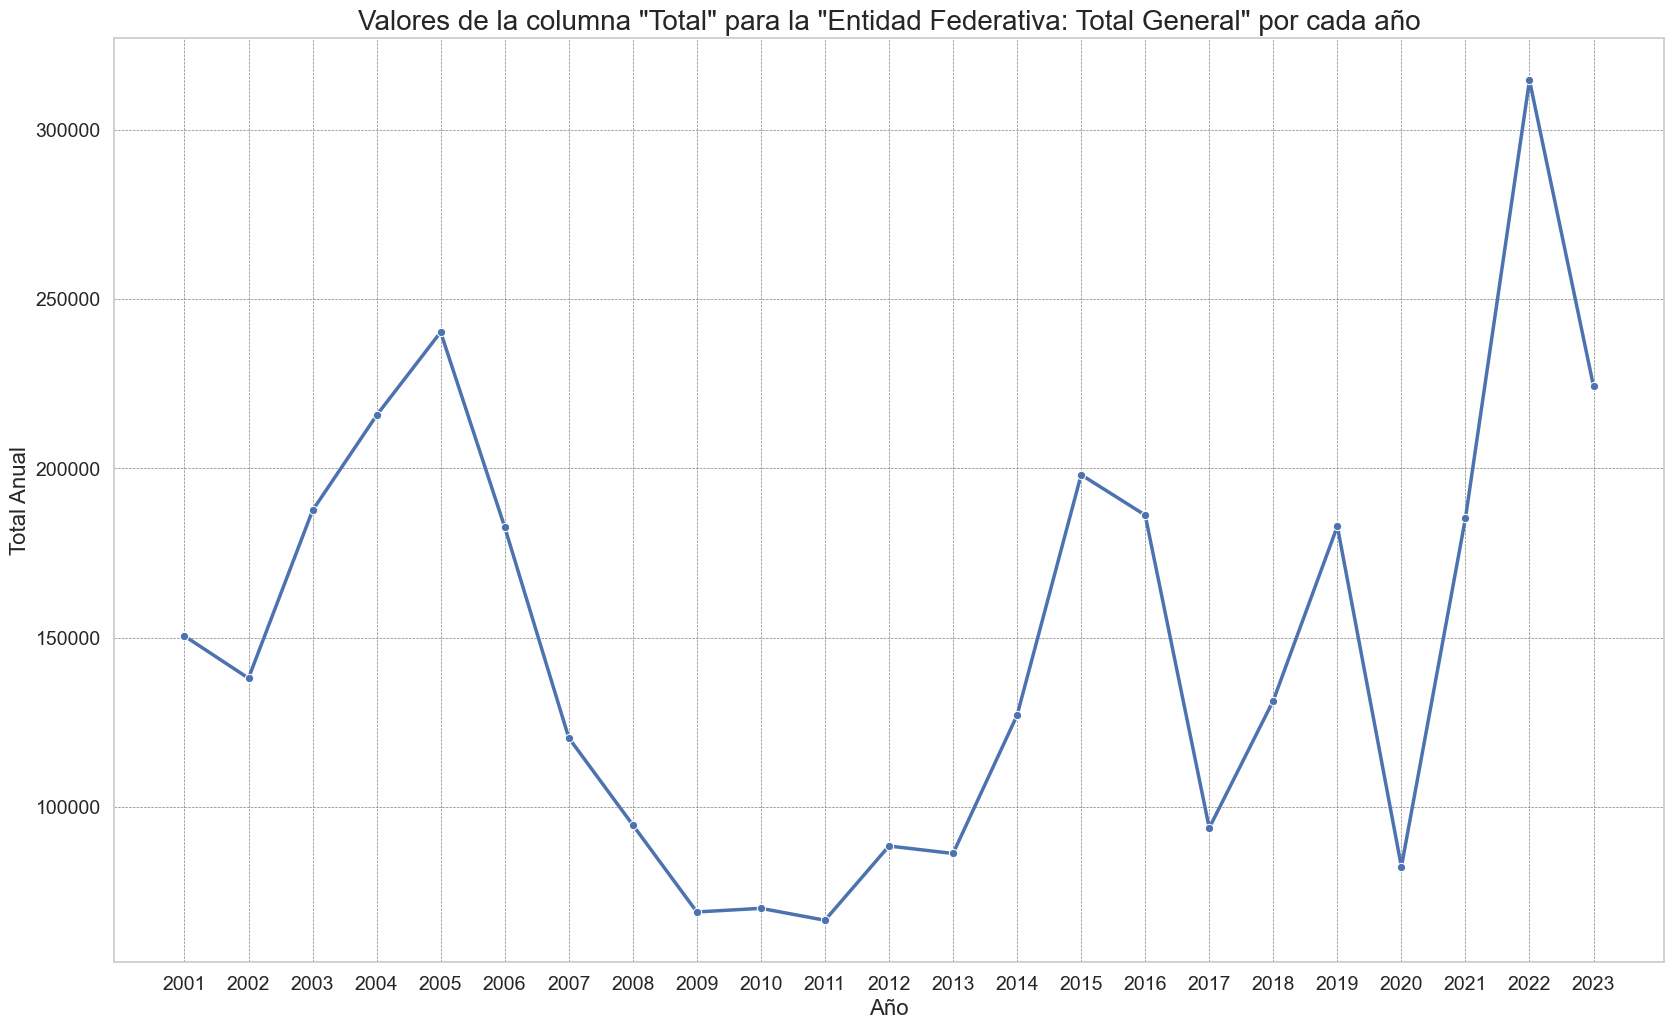

In [7]:

# Configuración de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(20, 12))

# Gráfico de líneas para los totales anuales
sns.lineplot(x='Año', y='Total', data=df_total_general, marker='o', linewidth=2.5, color='b')

# Añadir títulos y etiquetas
plt.title('Valores de la columna "Total" para la "Entidad Federativa: Total General" por cada año', fontsize=20)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Total Anual', fontsize=16)

# Asegurarse de que todas las etiquetas de los años se muestren en el eje x
plt.xticks(df_total_general['Año'].unique(), fontsize=14)
plt.yticks(fontsize=14)

# Agregar un fondo de cuadrícula con líneas punteadas grises
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Mostrar el gráfico
plt.show()

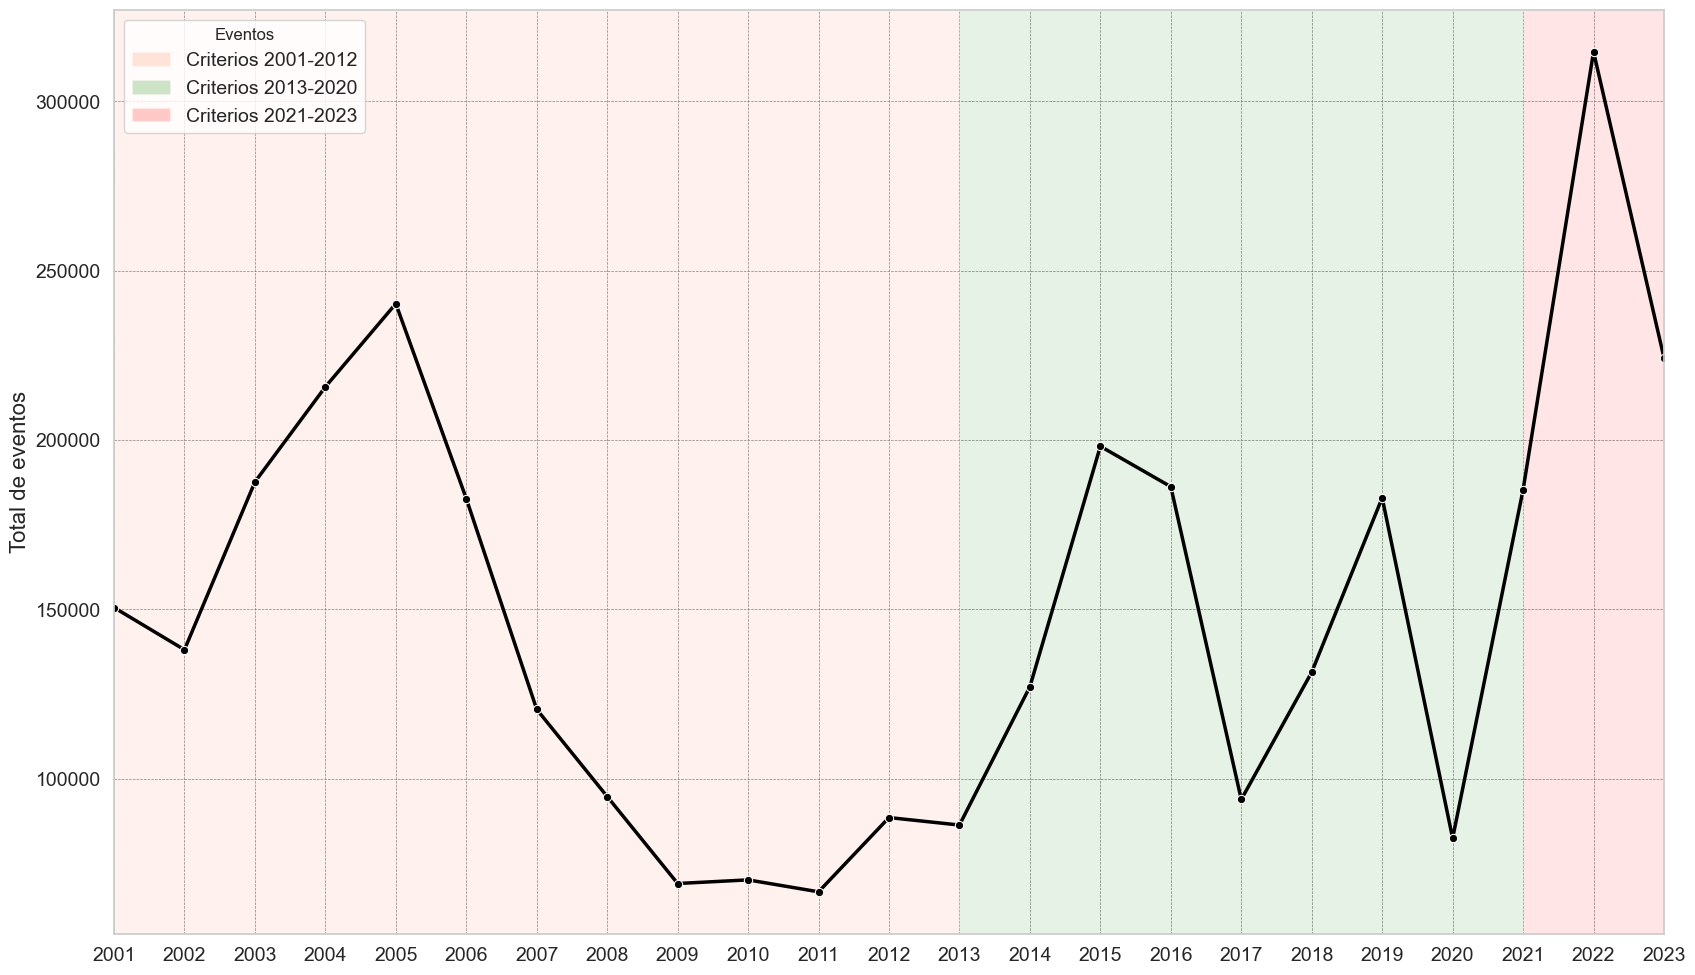

In [9]:
# Configuración de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico
fig, ax = plt.subplots(figsize=(20, 12))

# Gráfico de líneas para los totales anuales
sns.lineplot(x='Año', y='Total', data=df_total_general, marker='o', linewidth=2.5, color='black', ax=ax)

# Añadir títulos y etiquetas
#ax.set_title('Eventos de personas en situación migratoria irregular en México', fontsize=20,
             #fontname='Times New Roman')
ax.set_ylabel('Total de eventos', fontsize=16)#,fontname='Times New Roman')

# Eliminar la etiqueta del eje x
ax.set_xlabel('')

# Asegurarse de que todas las etiquetas de los años se muestren en el eje x
ax.set_xticks(df_total_general['Año'].unique())
ax.set_xticklabels(df_total_general['Año'].unique(), fontsize=14)
plt.yticks(fontsize=14)

# Agregar un fondo de cuadrícula con líneas punteadas grises
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Definir los eventos y sus colores
event_colors = {
    'Criterios 2001-2012': 'coral',
    'Criterios 2013-2020': 'green',
    'Criterios 2021-2023': 'red'
}

# Dibujar los eventos en el gráfico
ax.axvspan(2001, 2013, facecolor=event_colors['Criterios 2001-2012'], alpha=0.1)
ax.axvspan(2013, 2021, facecolor=event_colors['Criterios 2013-2020'], alpha=0.1)
ax.axvspan(2021, 2023, facecolor=event_colors['Criterios 2021-2023'], alpha=0.1)

# Crear una leyenda para los eventos
handles = [plt.Rectangle((0, 0), 1, 1, facecolor=color, alpha=0.2) for color in event_colors.values()]
labels = list(event_colors.keys())
ax.legend(handles, labels, title='Eventos', loc='upper left', fontsize=14)

# Ajustar los límites del eje x para que comiencen en el primer año de tus datos
primer_año = df_total_general['Año'].min()
ultimo_año = df_total_general['Año'].max()
ax.set_xlim(primer_año, ultimo_año)

# Mostrar el gráfico
plt.show()

#### 2. Total de eventos por mes/año , small numbers.

    Histograma + LinePlot

In [ ]:
# Crear un nuevo DataFrame para almacenar los datos "aplanados"
df_flattened = pd.DataFrame(columns=['Año-Mes', 'Total'])

# Aplanar el DataFrame original
for index, row in df_total_general.iterrows():
    for mes in ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']:
        año = row['Año']
        total = row[mes]
        df_flattened = df_flattened.append({'Año-Mes': f"{año}-{mes}", 'Total': total}, ignore_index=True)

# Agregar una nueva columna que contenga solo el año
#df_flattened['Año'] = df_flattened['Año-Mes'].apply(lambda x: x.split('-')[0])

# Separar el año y el mes en dos columnas diferentes
df_flattened['Año'] = df_flattened['Año-Mes'].apply(lambda x: x.split('-')[0])
df_flattened['Mes'] = df_flattened['Año-Mes'].apply(lambda x: x.split('-')[1])

#Cambiamos tipo de datos
df_flattened['Total'] = df_flattened['Total'].astype(int)
df_flattened['Año'] = df_flattened['Año'].astype(int)


In [ ]:
# Configuración de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(20, 12))

# Gráfico de líneas para los totales mensuales
sns.lineplot(x='Año-Mes', y='Total', data=df_flattened, color='b', linewidth=2.5)

# Añadir títulos y etiquetas
plt.title('Valores de la columna "Total" a lo largo del tiempo', fontsize=20)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Total Mensual', fontsize=16, color='b')

# Asegurarse de que todas las etiquetas de los años se muestren en el eje x
unique_years = df_flattened['Año'].unique()
year_indices = [df_flattened[df_flattened['Año'] == year].index[0] for year in unique_years]
plt.xticks(year_indices, unique_years, fontsize=14)
plt.yticks(fontsize=14)

# Agregar un fondo de cuadrícula con líneas punteadas grises
plt.grid(True, linestyle='--', linewidth=0.5, color='black')

# Mostrar el gráfico
plt.show()

In [ ]:
#Histograma "barras" totales por cada año

# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(20, 12))

# Grafico principal "Histograma"
ax1.bar(df_total_general['Año'].astype(str), df_total_general['Total'], alpha=0.6, color='g')


# Añadir títulos y etiquetas
ax1.set_title('Valores de la columna "Total" para la "Entidad Federativa: Total General"')
ax1.set_xlabel('Año')
#ax1.set_ylabel('Total Mensual', color='b')
ax1.set_ylabel('Total Anual', color='g')

# Asegurarse de que todas las etiquetas de los años se muestren en el eje x


# Agregar un fondo de cuadrícula con líneas punteadas grises
ax1.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Mostrar el gráfico
plt.show()

In [ ]:
# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(20, 12))

# Calcular las posiciones de las barras en el gráfico de barras
bar_positions = np.linspace(0, len(df_flattened) - 1, len(df_total_general))

# Gráfico de barras para los totales anuales
ax1.bar(bar_positions, df_total_general['Total'], width=12, alpha=0.6, color='g', align='edge')

# Crear un segundo eje y para el gráfico de líneas
ax2 = ax1.twinx()
ax2.plot(df_flattened['Total'], color='b')

# Establecer explícitamente los límites del eje x para ambos gráficos
ax1.set_xlim(0, len(df_flattened))
ax2.set_xlim(0, len(df_flattened))

# Añadir títulos y etiquetas
ax1.set_title('Valores de la columna "Total" para la "Entidad Federativa: Total General"')
ax1.set_xlabel('Año')
ax1.set_ylabel('Total Anual', color='g')
ax2.set_ylabel('Total Mensual', color='b')

# Asegurarse de que todas las etiquetas de los años se muestren en el eje x
ax1.set_xticks(bar_positions + 6)  # Ajustar la posición para que se alinee con el centro de las barras
ax1.set_xticklabels(df_total_general['Año'].astype(str).tolist())

# Agregar un fondo de cuadrícula con líneas punteadas grises
ax1.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Mostrar el gráfico
plt.show()